##Importing important Libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

##Importing Dataset

In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

##Checking for missing values in each column

In [7]:
df.replace(['unknown','Na'],np.nan,inplace = True)

In [8]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

###Feature Engineering

In [9]:
## Convert 'Date' column to datetime format for easier time-based operations

df['Date'] = df['Date'].astype('datetime64[ns]')

In [10]:
#Feature Extraction
#Creating new columns 'month' and 'day'

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [11]:
##  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.

df['Weekdays_or_Weekend'] = df['Day'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)

In [12]:
# Now We can Drop Day and Date columns.
df.drop(['Date','Day'],axis=1 ,inplace=True)

In [13]:
df.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew point temperature  Radiation  Rainfall  Snowfall Seasons     Holiday  \
0                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
1                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
2                  -17.7        0.0       0.0       0.0  Winter  No Holiday   
3                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
4                  -18.6        0.0       0.0       0.0  Winter  No Holiday   

  Functioning Day  Month  Weekdays_or_Weekend  
0             Yes      1                    0  
1             Yes      1                    0  
2             Yes      1                    0  
3             Yes      1                    0  
4             Yes      1                    0

##Summary Statistics

In [14]:
df.describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature    Radiation     Rainfall  \
count  8760.000000            8760.000000  8760.000000  8760.000000   
mean   1436.825799               4.073813     0.569111     0.148687   
std     608.298712              13.060369     0.868746     1.128193   
min      27.000000             -30.600000     0.000000     0.000000   
25%     940.000000              -4.700000     0.000000     0.000000   
50%    1698.000000               5.100000     0.010000     0.000000   
75%    2000.000000              14.800000     0.930000     0.000000   
max    2000.000000              27.200000     3.520000    35.000000   

          Snowfall        Month  Weekdays_or_Weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

In [15]:
# checking Duplicate rows in our BikeData.
duplicates = df.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


In [16]:
df['Month'] = df['Month'].astype('category')

In [17]:
df['Weekdays_or_Weekend'] = df['Weekdays_or_Weekend'].astype('category')

In [18]:
num_col = df.select_dtypes(include=np.number).columns

In [19]:
num_col

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

In [20]:
cat_col = df.select_dtypes(include=['object','category']).columns

In [21]:
cat_col

Index(['Seasons', 'Holiday', 'Functioning Day', 'Month',
       'Weekdays_or_Weekend'],
      dtype='object')

#Exploratory Data Analysis

###Univariate Analysis of Categorical Variables

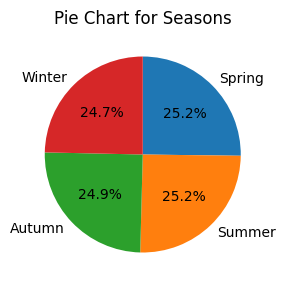

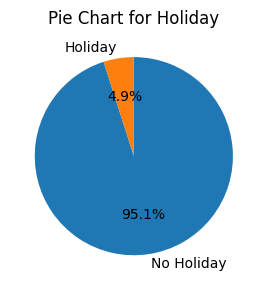

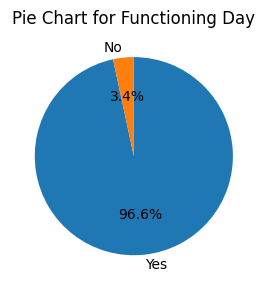

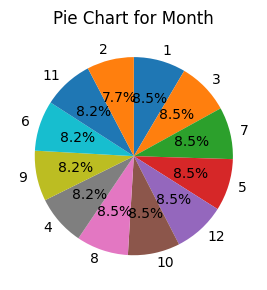

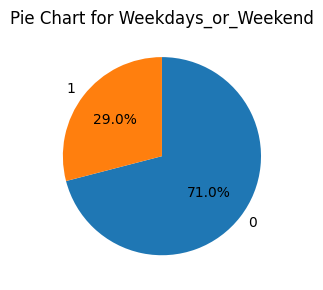

In [22]:
for col in cat_col:
    plt.figure(figsize=(3, 3))
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False )
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()



1. The distribution of data across Spring, Summer, Autumn, and Winter is
almost equal, each season occupying about 25% of the dataset.
2. "No Holiday" makes up a large majority (95.1%) of the data.
3.  "Yes" for functioning days dominates at 96.6%, while "No" (non-functioning days) is only 3.4%.
4. Data is evenly distributed across all 12 months with each month contributing around 8-9 %.
5. 71 % of the data is from weekdays and 29 % from weekends , matching a typial weekly pattern.













##Dependent Variable VS Categorical Columns

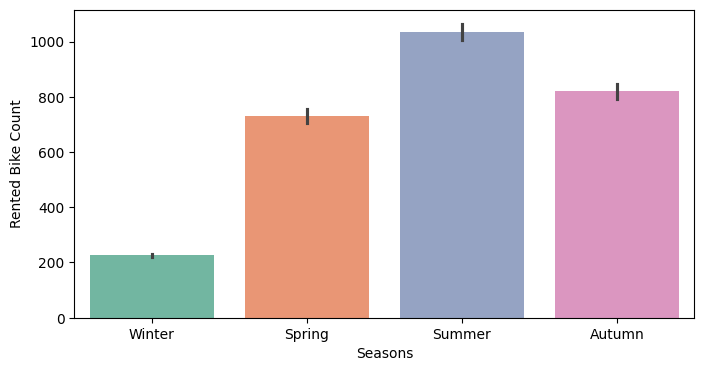

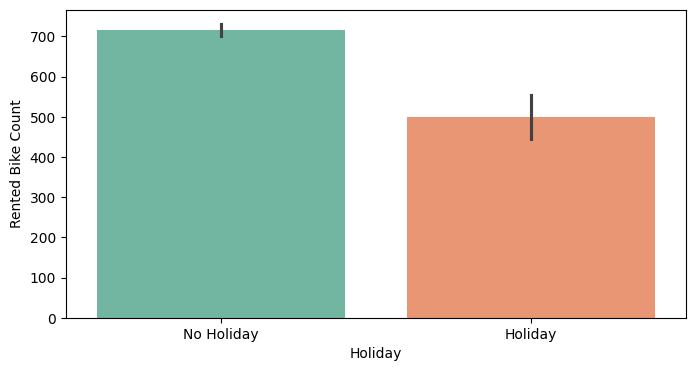

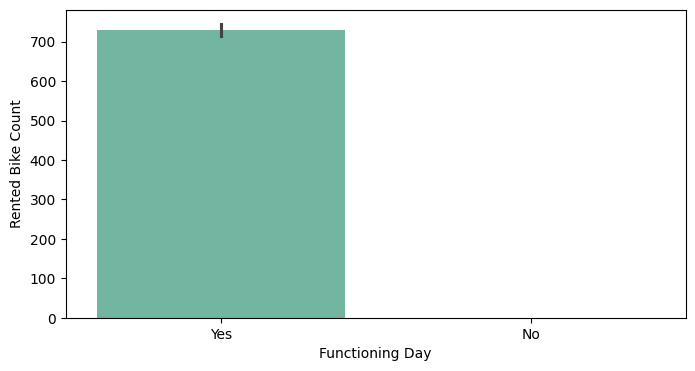

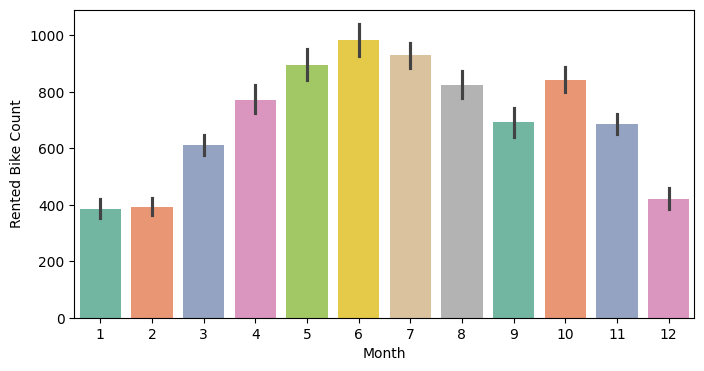

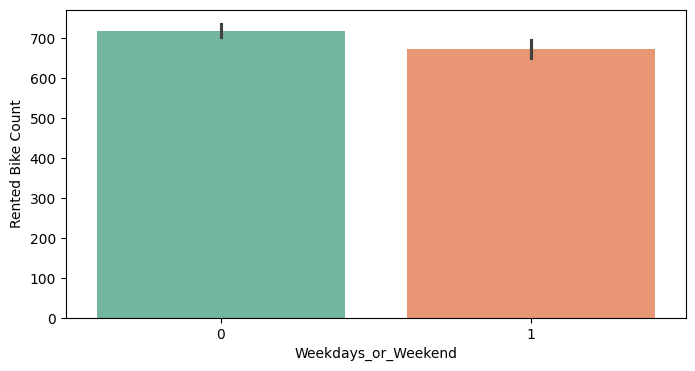

In [23]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in cat_col:
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    sns.barplot(x = df[col], y = df['Rented Bike Count'], palette='Set2')


###Observations:
1. Summer season has the highest bike rent count.Bike rentals in winter is very less compared to other seasons.
2. High number of bikes were rented on no holidays.
3. On no functioning days,no bikes were rented.
4. Most of the bikes were rented on weekdays compared to weekends.
5. From March bike rent count started increasing and it was highest in June.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

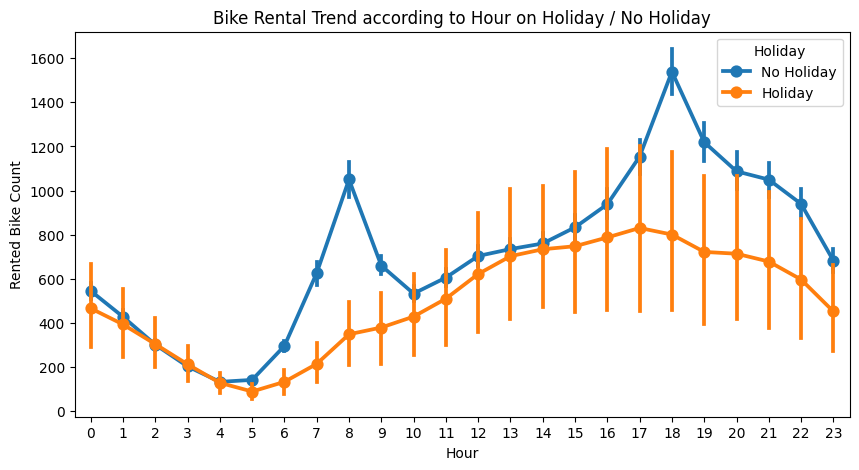

In [24]:
#Bike rental trend wrt hour on Holiday/No holiday
plt.figure(figsize=(10,5))
sns.pointplot(x=df['Hour'] , y = df['Rented Bike Count'],hue = df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

###Observations:
1. On non-holidays, bike rentals peak at 8:00 AM and 6:00 PM, likely due to office and college commuters traveling to and from work.
2. On holidays, rentals gradually rise and peak around 2:00–3:00 PM, suggesting leisure activities or outings.



Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning/Non Functioning Day')

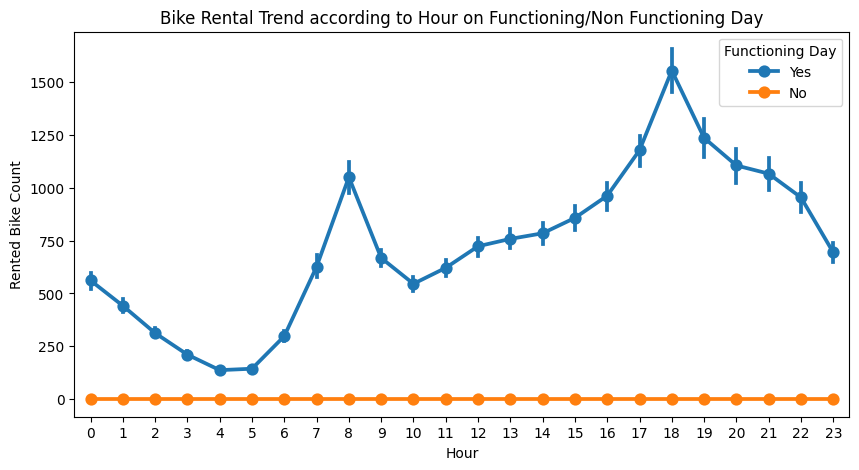

In [25]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(10,5))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Functioning Day'])
plt.title("Bike Rental Trend according to Hour on Functioning/Non Functioning Day")

###Observations:
The graph shows that on functioning days (blue line), bike rentals peak sharply around 8 AM and 6 PM, indicating commute times, while on non-functioning days (orange line), rentals remain consistently low throughout the day. This highlights significantly higher and time-specific bike usage on working days compared to non-working days.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on different seasons')

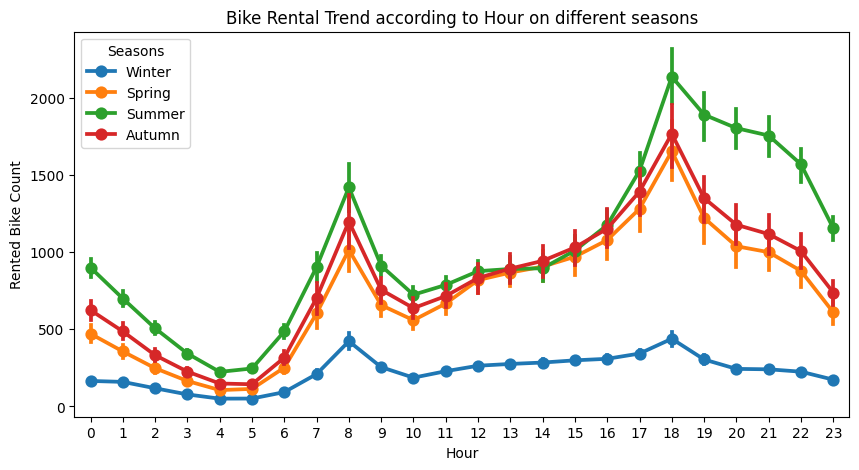

In [26]:
# Bike Rental trend with respect to Hour on Seasons
plt.figure(figsize=(10,5))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Seasons'])
plt.title("Bike Rental Trend according to Hour on different seasons")

###Observations:
The graph shows that bike rentals are highest in summer, followed by spring and autumn, with winter having the lowest usage throughout the day. All seasons show peak rentals around 8 AM and 6 PM, but the difference is most pronounced in summer, indicating more favorable weather boosts bike usage.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on different months')

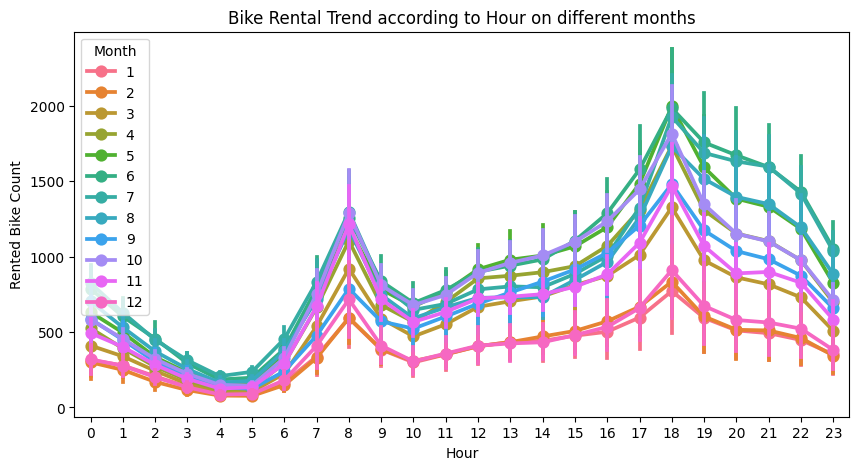

In [27]:
# Bike Rental trend with respect to Hour on Months
plt.figure(figsize=(10,5))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Month'])
plt.title("Bike Rental Trend according to Hour on different months")

###Observations:
The graph shows that bike rentals peak around 8 AM and 6 PM across all months, with the highest counts in May to October (months 5–10), especially June and September. In contrast, winter months (December–February) show significantly lower rentals, indicating seasonal influence on bike usage.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on weekdays or weekends')

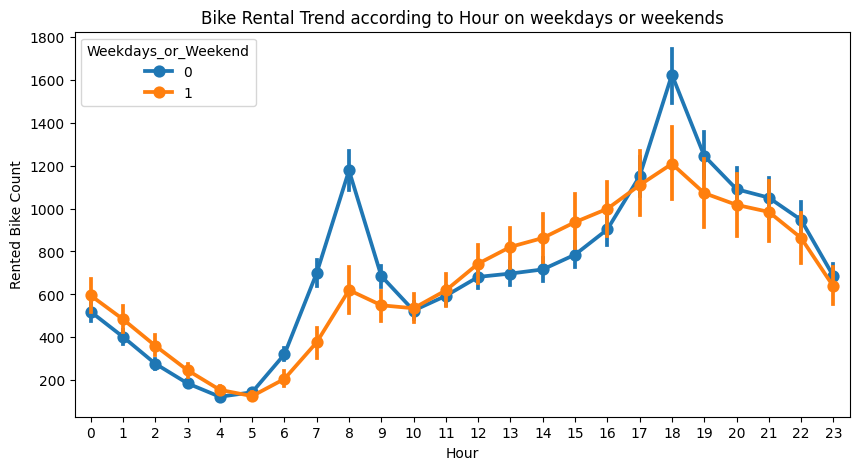

In [28]:
# Bike Rental trend with respect to Hour on weekdays and weekends
plt.figure(figsize=(10,5))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Weekdays_or_Weekend'])
plt.title("Bike Rental Trend according to Hour on weekdays or weekends")

###Observation:
The graph shows that on weekdays (blue line), bike rentals peak sharply at 8 AM and 6 PM, aligning with office commute times, while on weekends (orange line), rentals are more evenly spread with a single broader peak around 5–6 PM. Overall, weekday rentals show distinct rush hour usage, whereas weekend usage is more relaxed and steady throughout the day.

##Univariate Analysis of Continuous Variables

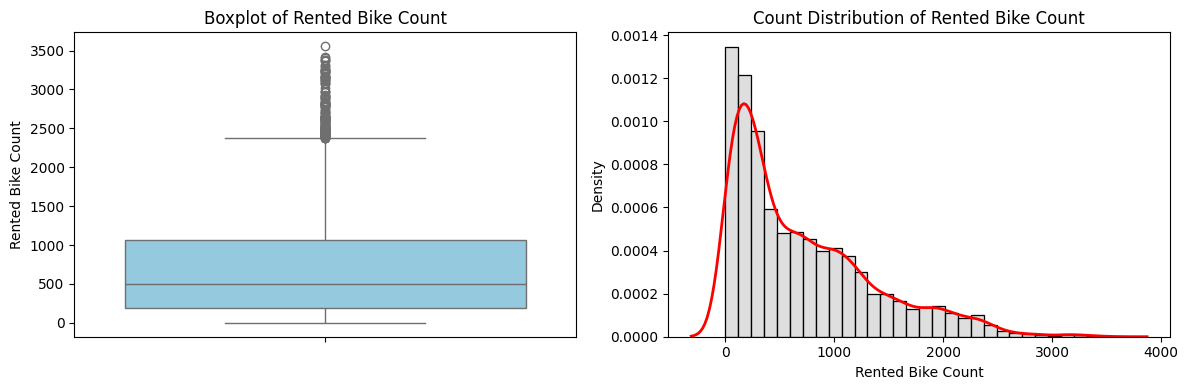

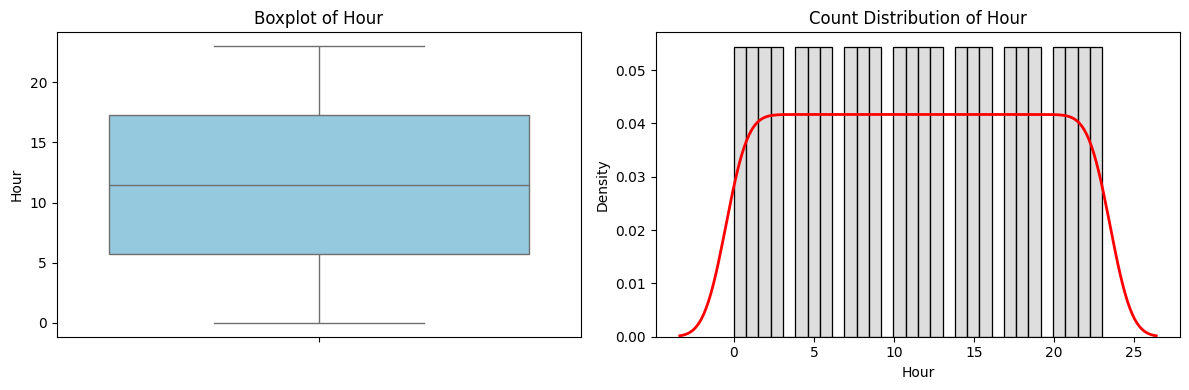

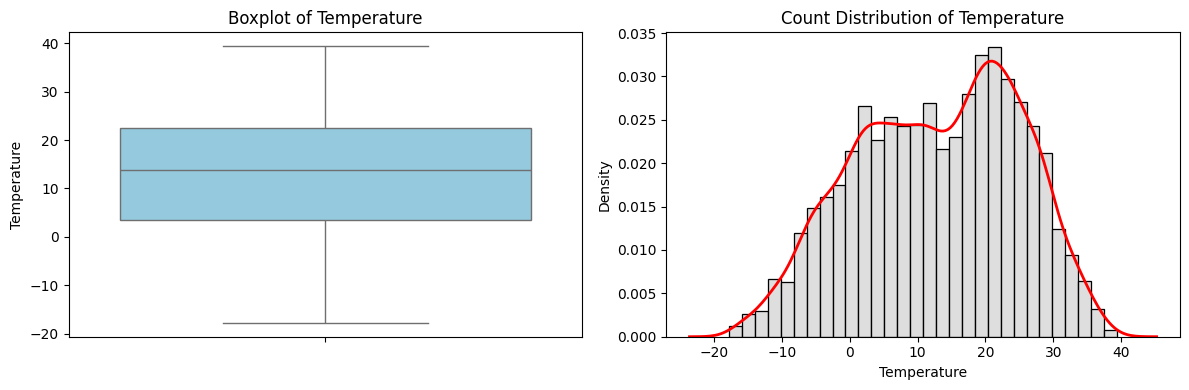

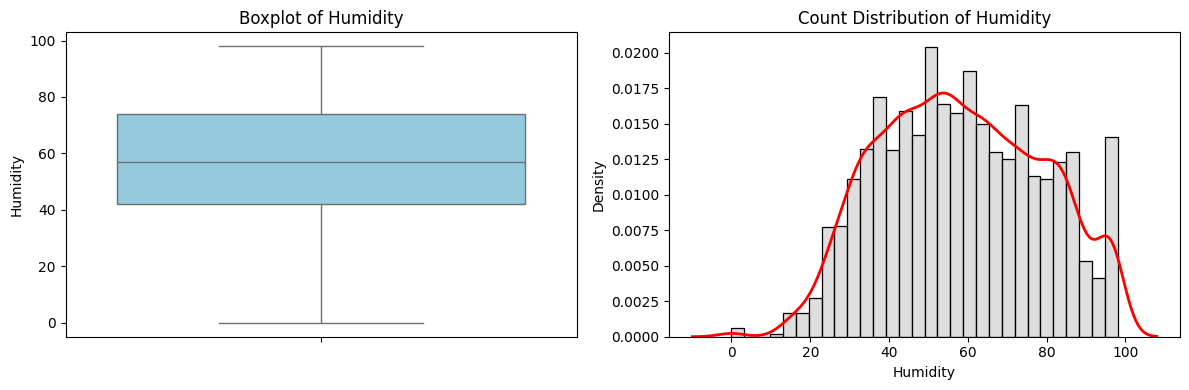

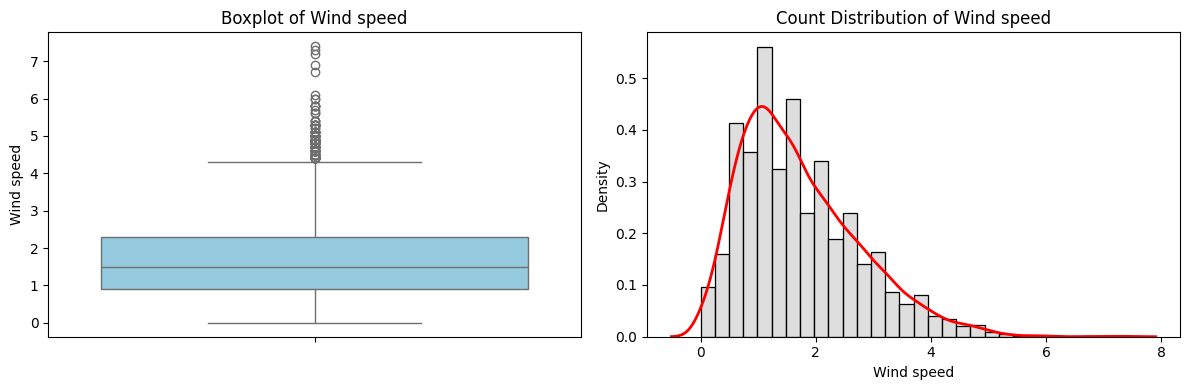

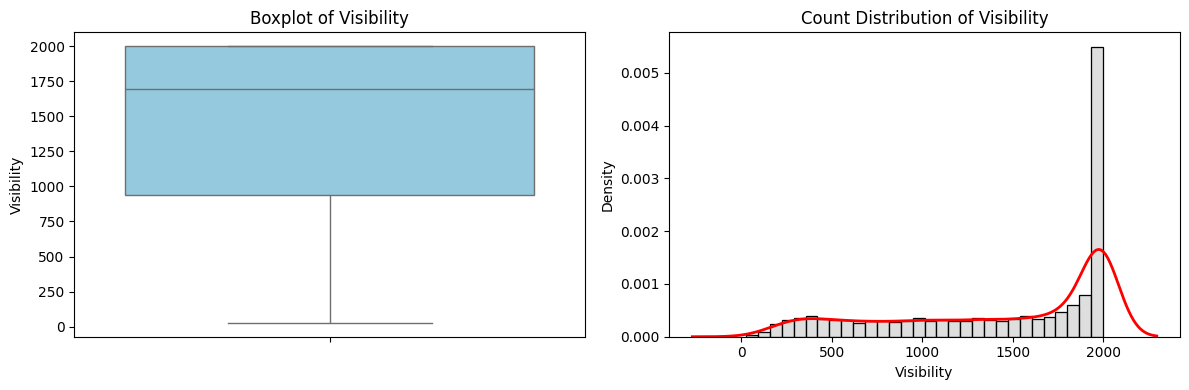

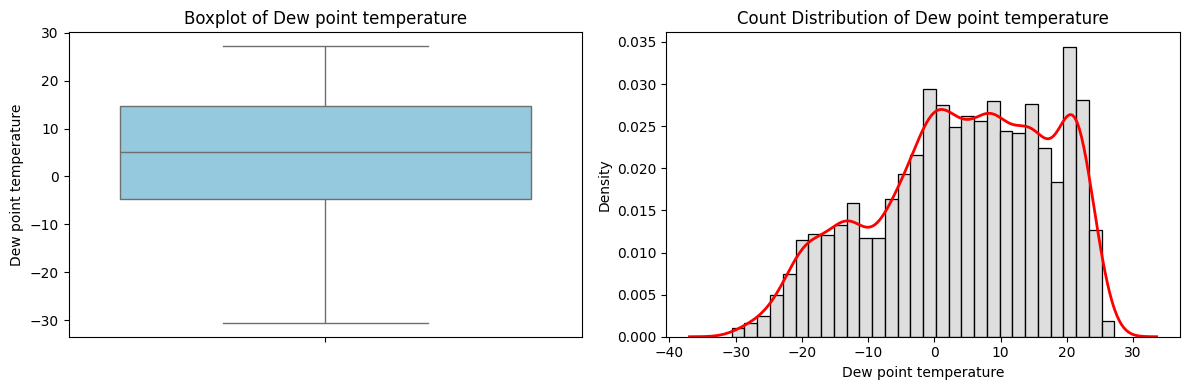

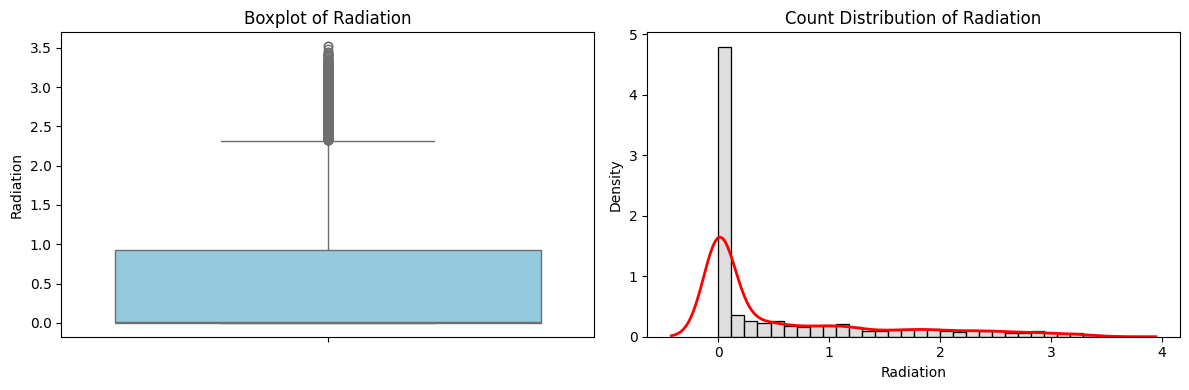

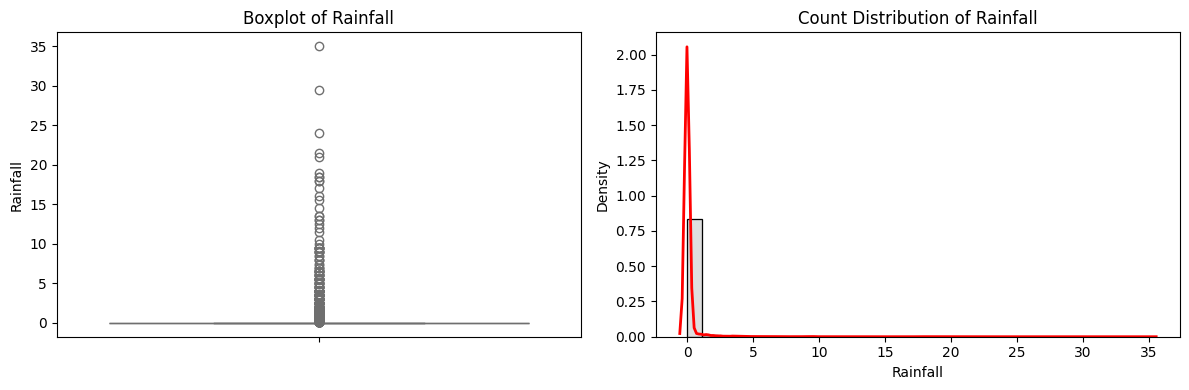

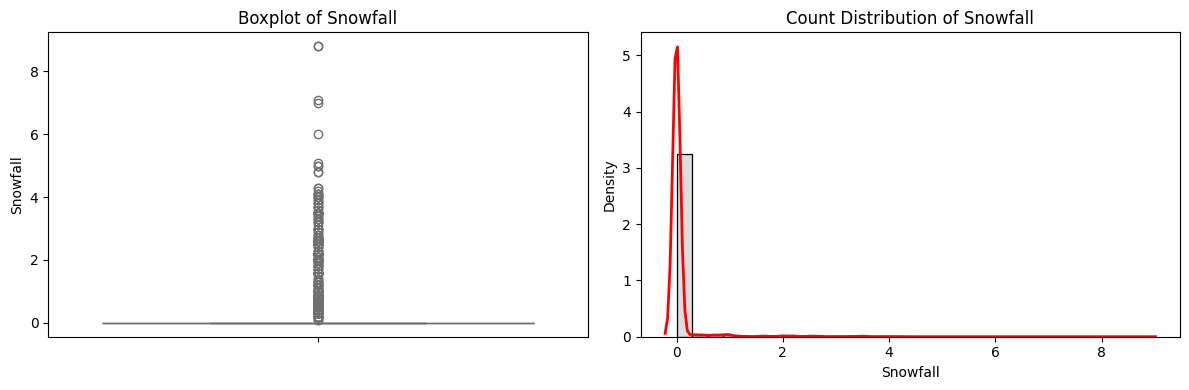

In [29]:
for var in num_col:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[var].dropna(), color='skyblue')
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

    # Histogram + KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df[var].dropna(), stat="density", bins=30, color='lightgray', edgecolor='black')
    sns.kdeplot(df[var].dropna(), color='red', linewidth=2)
    plt.title(f'Count Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


The Rented Bike Count is highly right-skewed with many outliers, indicating that most rentals are low with occasional high spikes. Weather variables like Temperature, Humidity, and Dew Point show relatively balanced distributions, though Temperature appears bimodal, reflecting seasonal changes.
Rainfall, Snowfall, Radiation, and Wind Speed are heavily skewed with numerous outliers, suggesting rare but extreme values.'Hour' variable is uniformly distributed across the 24 hours,there's no skewness or outliers,indicating balanced data throughout the day. Visibility is mostly at its maximum, indicating frequent clear days. Overall, many variables exhibit non-normal distributions, which may require transformation or robust models.

###The PowerTransformer is a preprocessing technique used to make data more normally distributed by reducing skewness and stabilizing variance. It is especially useful for features that are highly skewed or have non-linear relationships with the target variable.

In [30]:
pt = PowerTransformer(method = 'yeo-johnson')
df[num_col] = pt.fit_transform(df[num_col])

###Univariate Analysis after applying power transformer

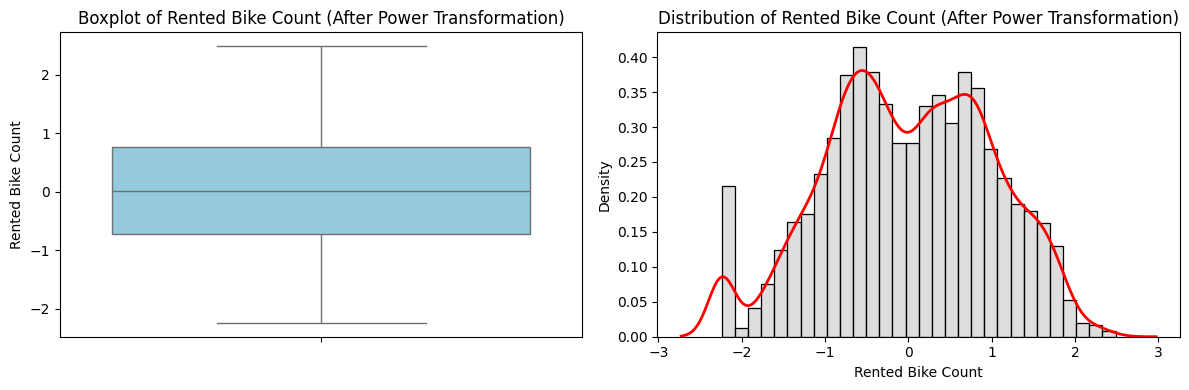

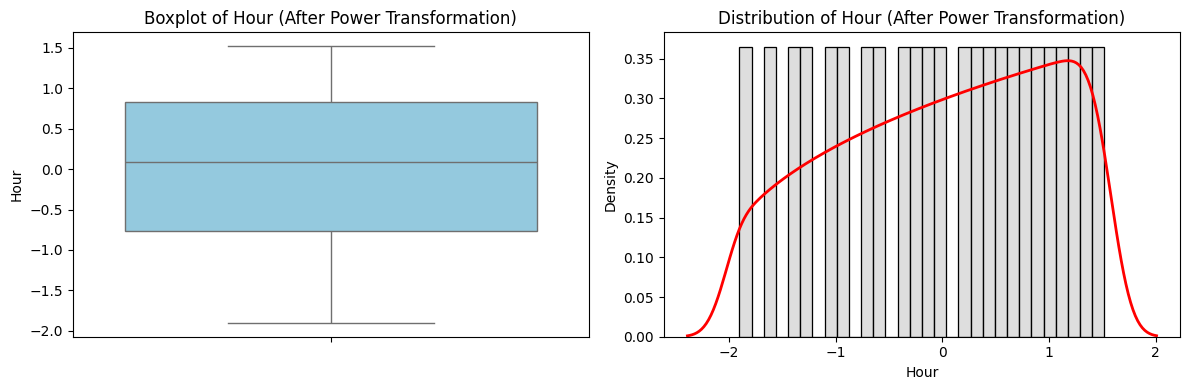

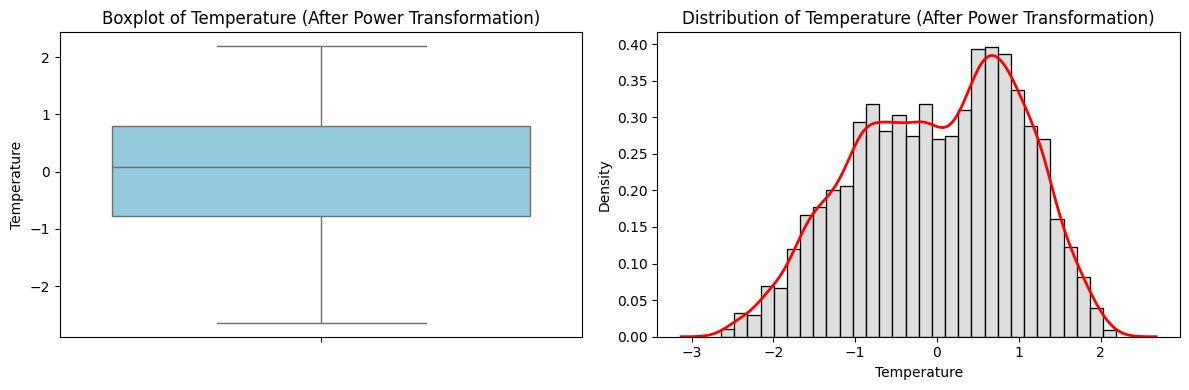

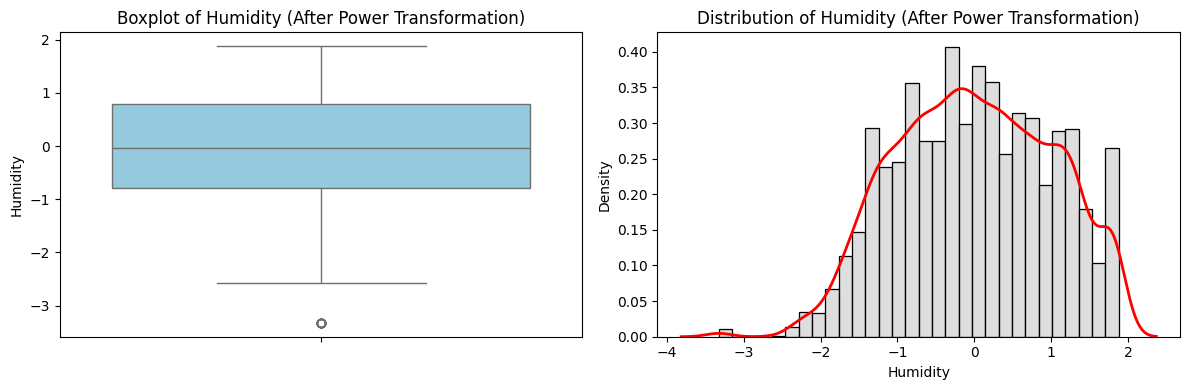

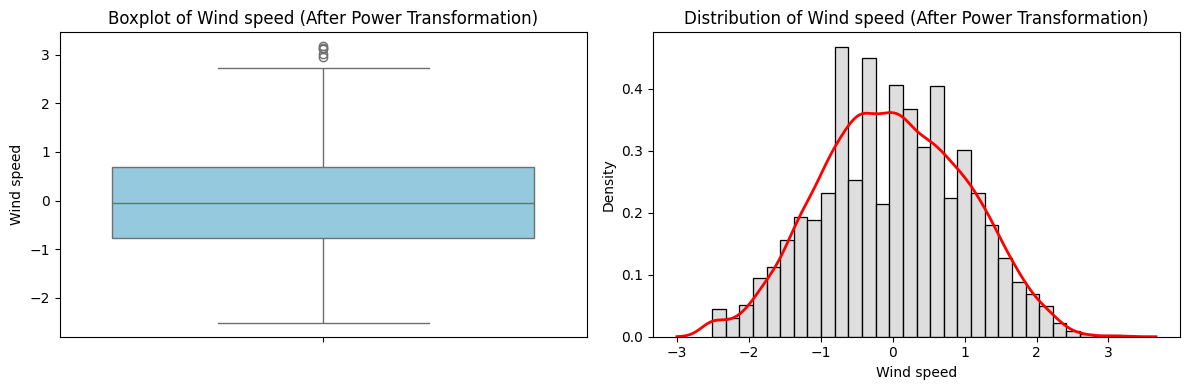

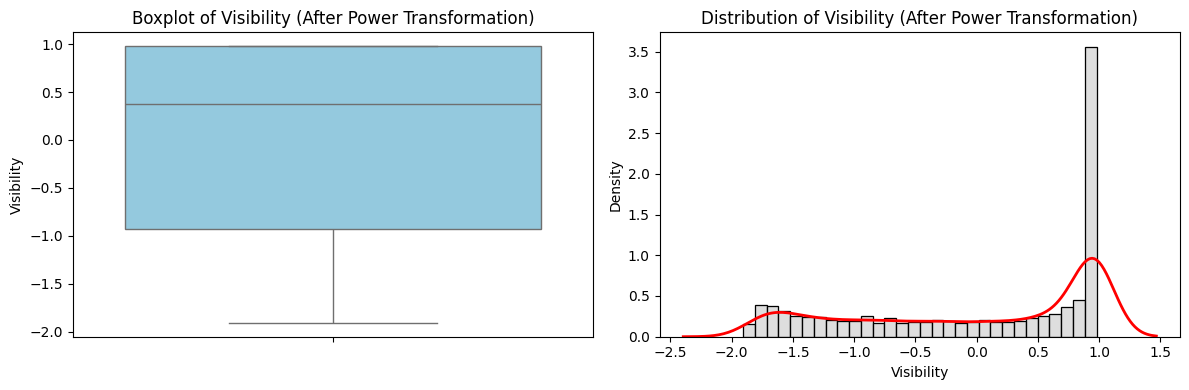

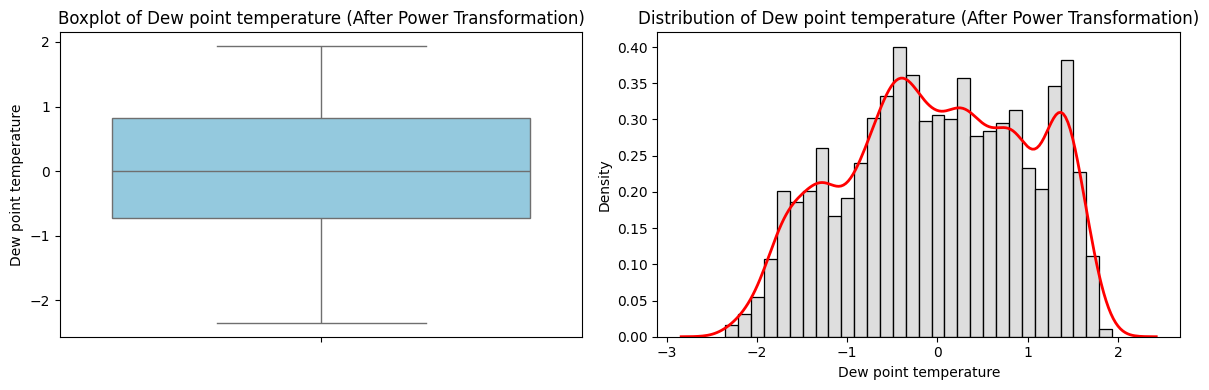

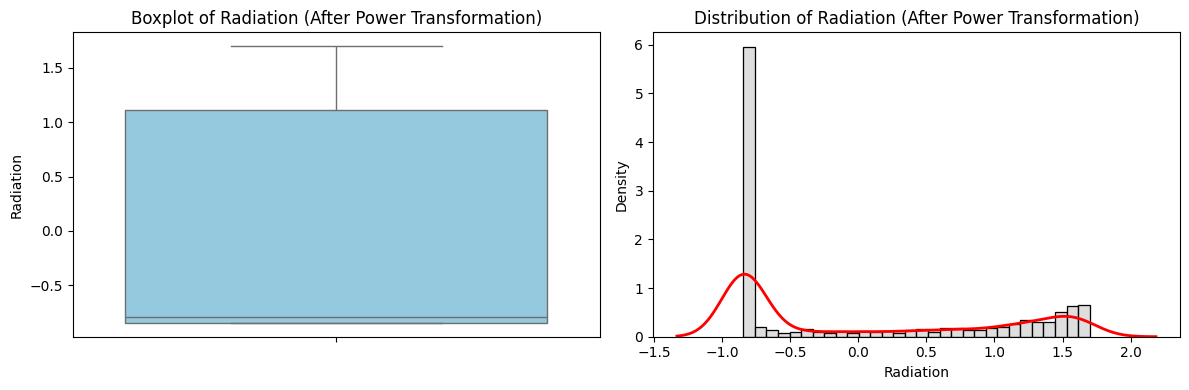

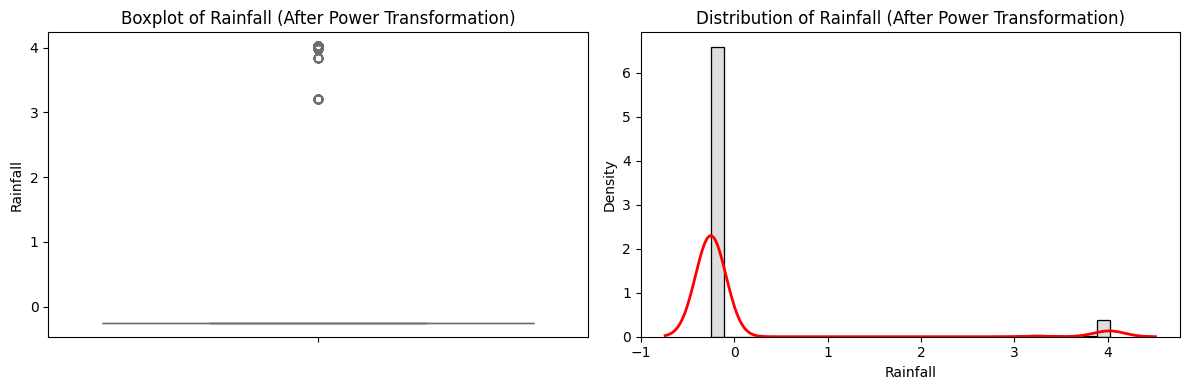

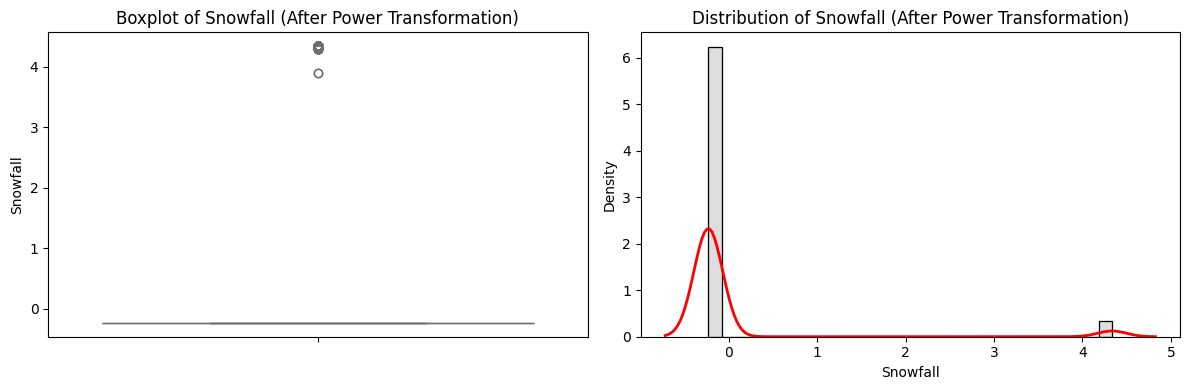

In [31]:
for var in num_col:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[var].dropna(), color='skyblue')
    plt.title(f'Boxplot of {var} (After Power Transformation)')
    plt.ylabel(var)

    # Histogram + KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df[var].dropna(), stat="density", bins=30, color='lightgray', edgecolor='black')
    sns.kdeplot(df[var].dropna(), color='red', linewidth=2)
    plt.title(f'Distribution of {var} (After Power Transformation)')
    plt.xlabel(var)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


###Dependent Variable Vs Continuous Columns

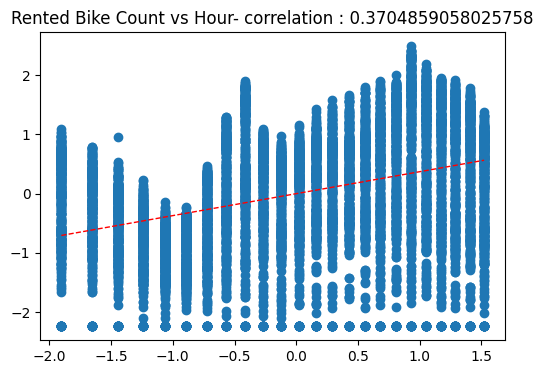

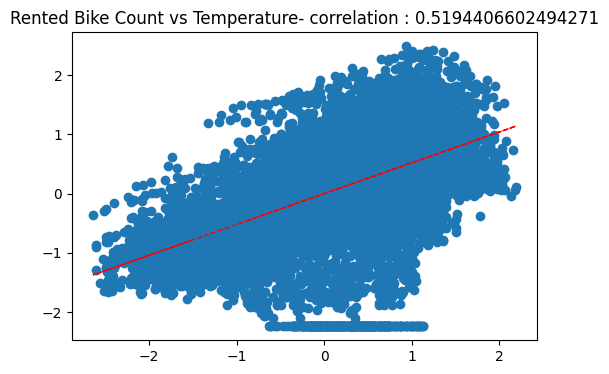

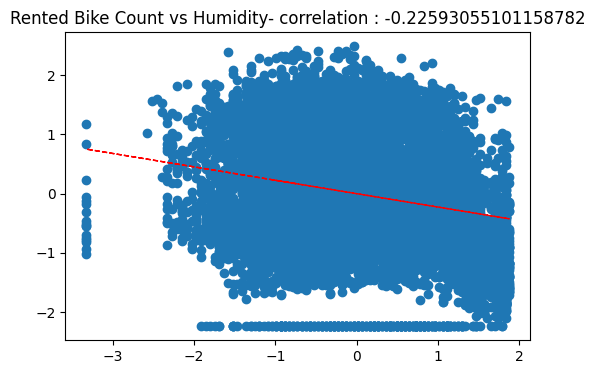

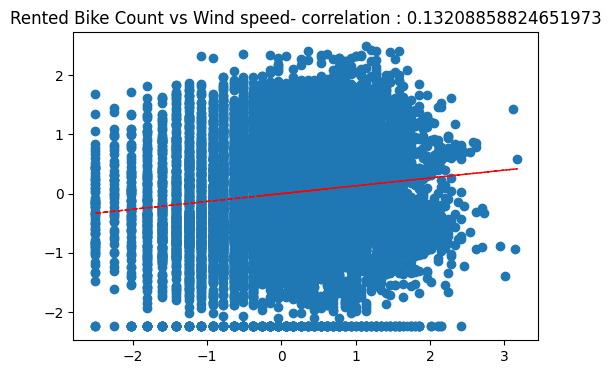

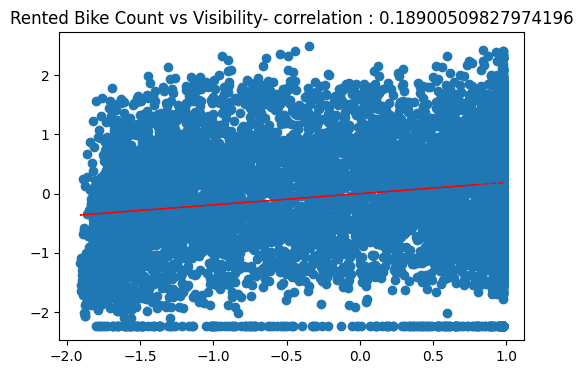

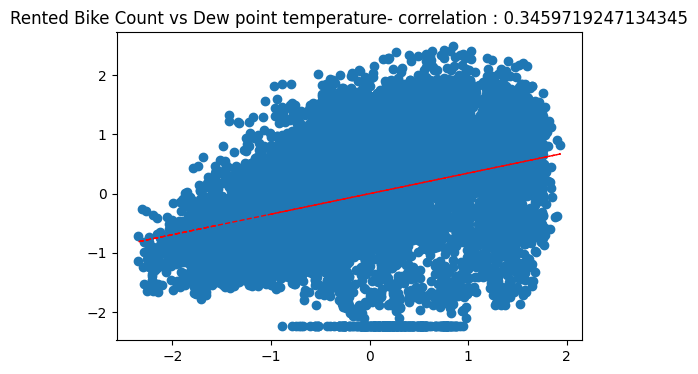

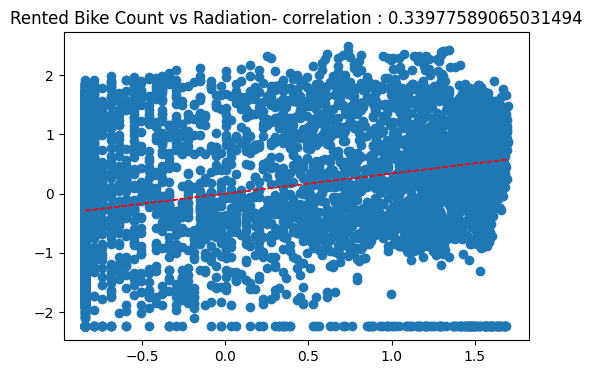

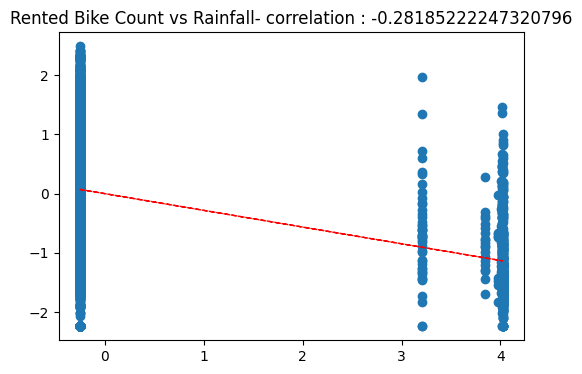

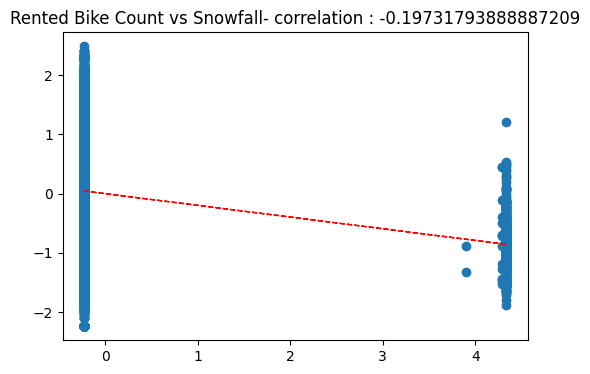

In [32]:
for col in num_col[1:]:
  fig = plt.figure(figsize=(6, 4))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x = feature , y = label)
  ax.set_title('Rented Bike Count vs ' + col + '- correlation : ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

###Observations:
1. Strongest positive correlation is with temperature (0.52), indicating more bikes are rented as temperature rises.
2. Hour of the day (0.37), dew point (0.35), and radiation (0.34) also show moderate positive correlations.
3. Humidity (-0.23), rainfall (-0.28), and snowfall (-0.19) have negative correlations, meaning worse weather reduces bike rentals.
4. Wind speed (0.13) and visibility (0.18) have weak positive correlations, showing minimal influence.

###Correlation Heatmap

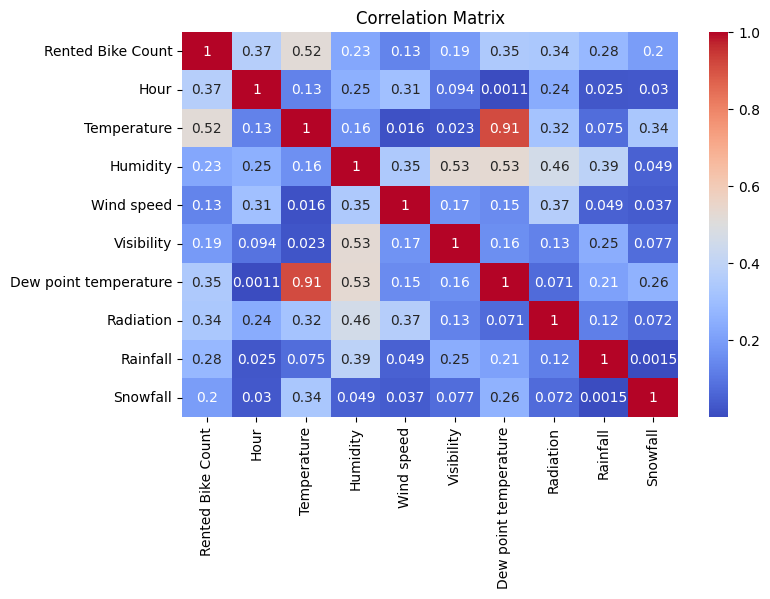

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(abs(df[num_col].corr()),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

###Check for Multicollinearity using Variance Inflation Factor

In [34]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]

  return vif

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0                   Hour   1.182670
1            Temperature  46.026911
2               Humidity  12.034723
3             Wind speed   1.298162
4             Visibility   1.564782
5  Dew point temperature  60.387097
6              Radiation   1.858436
7               Rainfall   1.198914
8               Snowfall   1.168005

In [36]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
del df['Dew point temperature']

In [37]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0         Hour  1.180457
1  Temperature  1.602807
2     Humidity  2.523959
3   Wind speed  1.297669
4   Visibility  1.502836
5    Radiation  1.827327
6     Rainfall  1.198674
7     Snowfall  1.163389

In [38]:
df = pd.get_dummies(df, columns=['Holiday','Seasons','Functioning Day','Month'], drop_first=True, dtype=int)

###Splitting our dataset into train and test set

In [39]:
# Create the dependent variable data
y = df['Rented Bike Count']

# Create the data of independent variables
X = df.drop('Rented Bike Count',axis=1)

In [40]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Feature Scaling

In [41]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Modelling

###1.Linear Regression

In [42]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train, y_pred_train)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train, y_pred_train)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train, y_pred_train)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test, y_pred_test)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test, y_pred_test)}')

The Mean Squared Error (MSE) for training set is : 0.27680943148318715
The Root Mean Squared Error (RMSE) for training set is : 0.5261268207221403
The R2 score for training set is : 0.7214286523201286
The Mean Squared Error (MSE) for testing set is : 0.292635742758963
The Root Mean Squared Error (RMSE) for testing set is : 0.5409581709882595
The R2 score for testing set is : 0.7141286880346569


###The Linear Regression model performs well, with an R² score of 0.72 on training data and 0.71 on testing data, meaning it explains about 71% of the variance in bike rental demand. The low and similar RMSE values (~0.53–0.54) for both sets indicate the model has consistent and accurate predictions. The small gap between training and testing metrics shows no signs of overfitting or underfitting.

In [44]:
#define a function to plot predicted y values and actual y values
def plot_pred_actual(y_pred,y_test):
  plt.figure(figsize = (13,5))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"])
  plt.title("Predicted V/S Actual")
  plt.show()

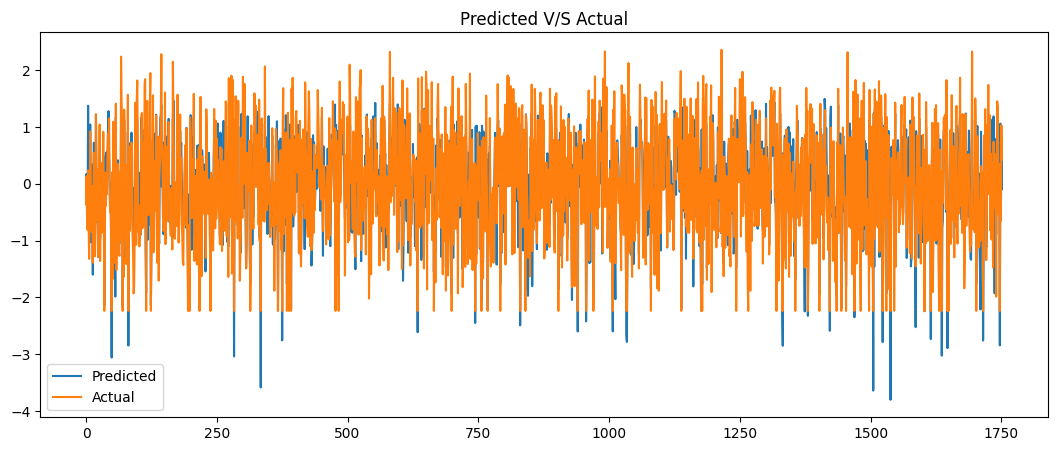

In [45]:
plot_pred_actual(y_pred_test,y_test)

Text(0.5, 0, 'y_pred_test')

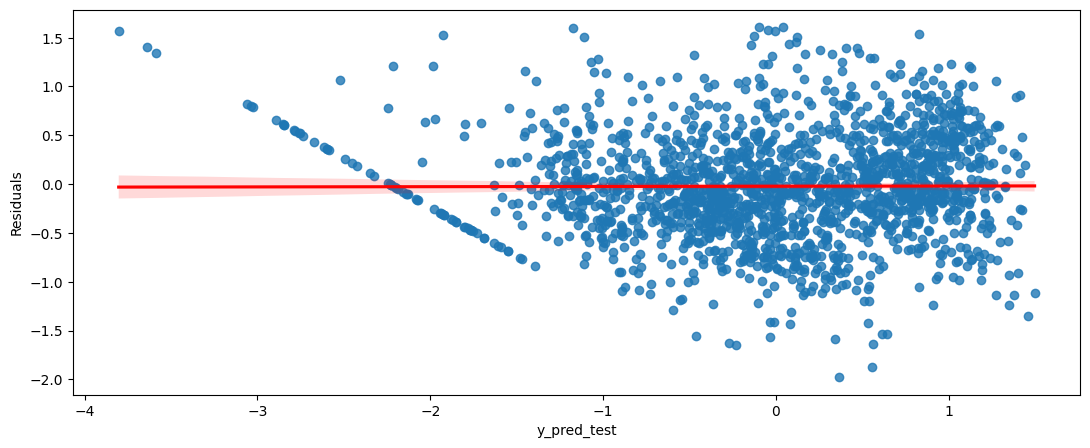

In [46]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test , y = y_test-y_pred_test , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test')

###The residual plot shows a fairly random scatter around zero with no clear pattern, indicating that the model satisfies the assumption of homoscedasticity (constant variance of errors). This supports that the linear regression model is appropriate and the errors are well-behaved, though slight funneling at higher values suggests minor heteroscedasticity worth monitoring.

In [47]:
#function to check for normality of the residuals
def residual_distplot(y_pred_test, y_test):
    residuals = y_test - y_pred_test
    plt.figure(figsize=(10,5))
    sns.histplot(residuals, kde=True, color='lightblue', edgecolor='black')
    plt.xlabel("Residuals (y_test - y_pred)", fontsize=12)
    plt.title("Residual Distribution")
    plt.show()


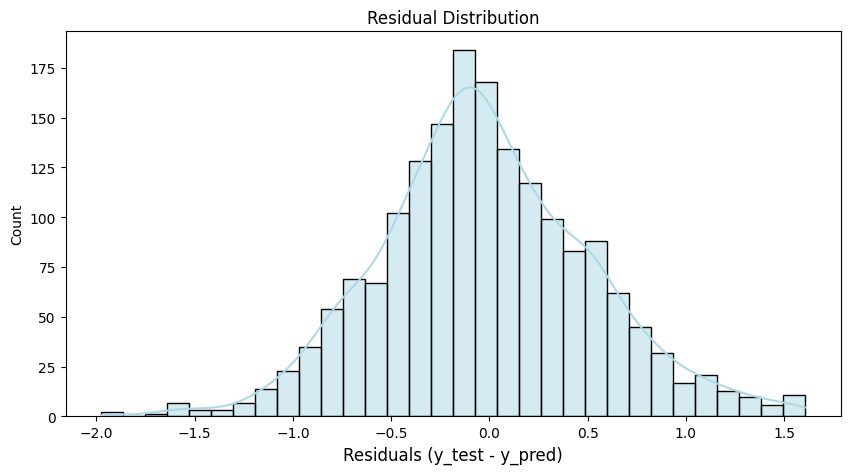

In [48]:
residual_distplot(y_pred_test,y_test)

###The residuals appear to be roughly normally distributed and centered around zero, indicating that the error terms are approximately symmetric and follow the assumptions of linearity and normality. This further supports the validity of the linear regression model.

####Let's regularize the model and see how perfomance changes

##Important Function

In [49]:
#This function takes model, training and testing sets and parameter combinations as input and gives model performance and best parameters as output

def model_trainer_tester(model, X_train_func, X_test_func, y_train_func, y_test_func, params):

  #grid search on provided parameter set
  reg_model = GridSearchCV(estimator = model , param_grid = params , scoring = 'r2' , cv = 3 , verbose = 2)
  reg_model.fit(X_train_func,y_train_func)

  #getting the optimal model and the parameters
  optimal_model = reg_model.best_estimator_
  optimal_model.fit(X_train_func,y_train_func)
  optimal_params = reg_model.best_params_

  #prediction on training set
  y_pred_train = optimal_model.predict(X_train_func)

  # Prediction on testing set
  y_pred_test = optimal_model.predict(X_test_func)

# Getting and printing evaluation metrics and best hyperparameters
  print(f'Best hyperparameter combination is : {optimal_params}')
  print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
  print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
  print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
  print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
  print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
  print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')

  return y_pred_train,y_pred_test



##Ridge regularized linear regression

In [50]:
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
y_pred_train_ridge , y_pred_test_ridge = model_trainer_tester(model = Ridge() , X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ........................................

###The Ridge Regression model with optimal alpha = 10 shows good performance, with an R² of 0.72 on the training set and 0.71 on the testing set, indicating strong generalization. The RMSE values are low and comparable across both sets (0.526 for train, 0.541 for test), suggesting the model is neither overfitting nor underfitting. Overall, the regularization effectively improved model stability and prediction accuracy.

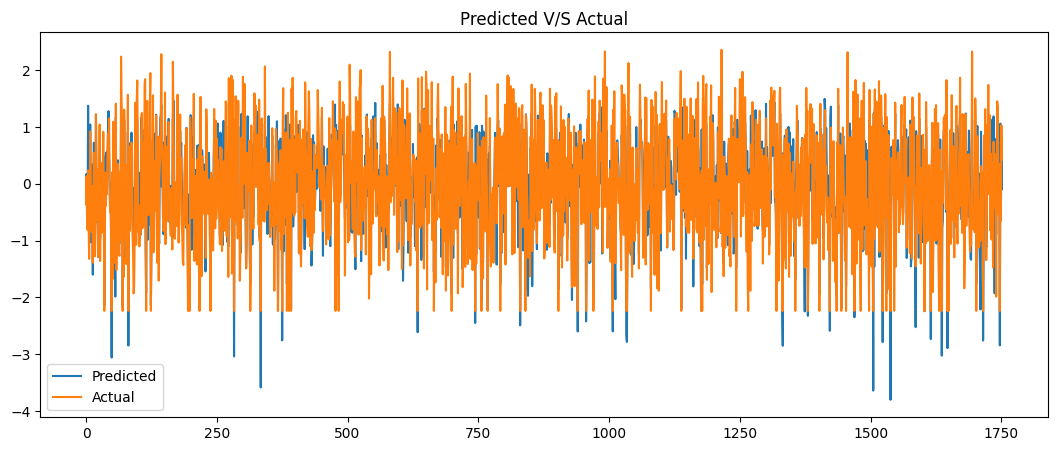

In [51]:
plot_pred_actual(y_pred_test_ridge , y_test)

###We can see very slight (negligible) improvements here. Let's fit a Lasso Regularization too and see how it performs.

Text(0.5, 0, 'y_pred_test_ridge')

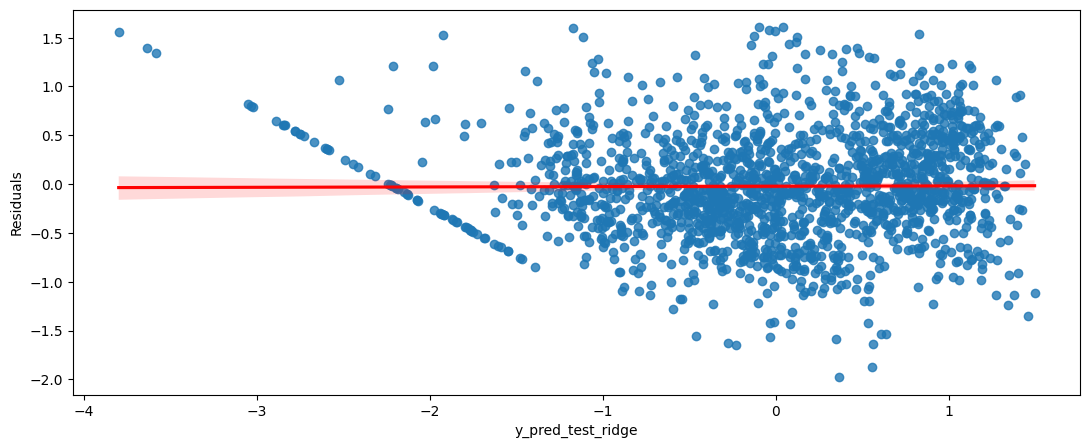

In [52]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test_ridge , y = y_test-y_pred_test_ridge , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_ridge')

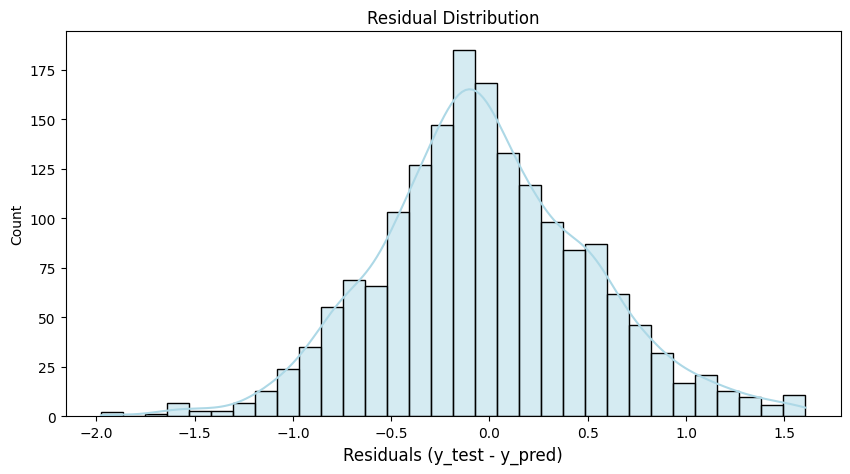

In [53]:
residual_distplot(y_pred_test_ridge , y_test)

##Lasso Regularized Linear Regression

In [54]:
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
y_pred_train_Lasso,y_pred_test_Lasso = model_trainer_tester(model = Lasso(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ........................................

####This Lasso Regression model, with an optimal alpha of 0.0001, performs almost identically to the plain Linear Regression model. It achieves an R² of 0.721 on the training set and 0.714 on the testing set, with nearly the same RMSE values (≈0.526 train, ≈0.541 test). The extremely small alpha value means very minimal regularization was applied, resulting in almost no improvement in performance or coefficient shrinkage. Hence, in this case, Lasso did not offer any significant advantage over standard linear regression.

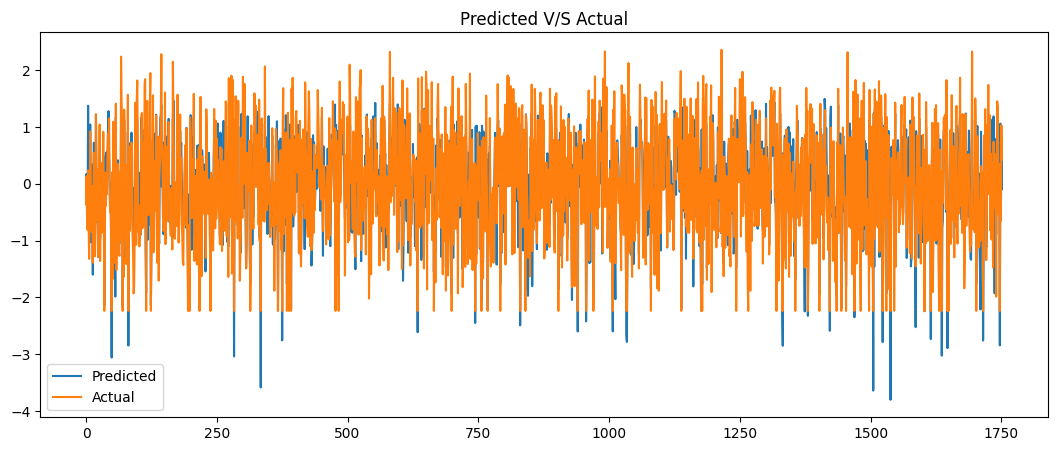

In [55]:
plot_pred_actual(y_pred_test_Lasso , y_test)

Text(0.5, 0, 'y_pred_test_lasso')

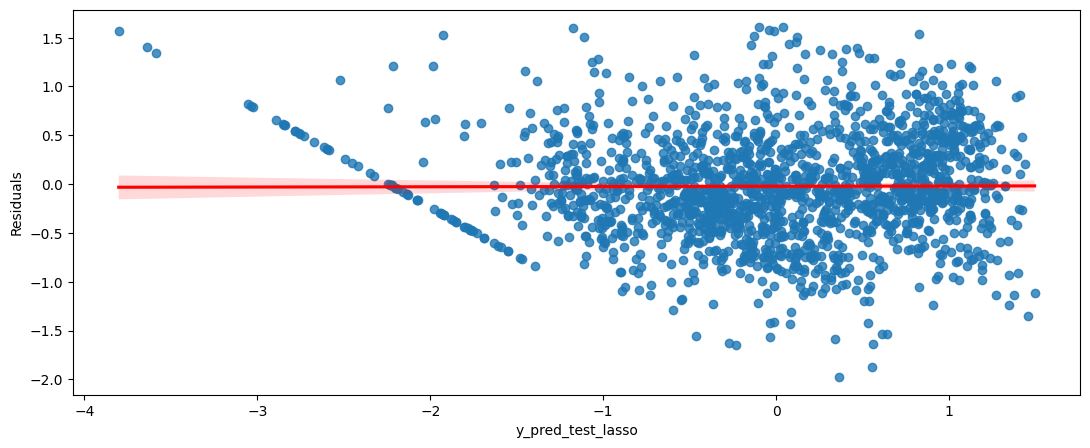

In [56]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test_Lasso , y = y_test-y_pred_test_Lasso , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_lasso')

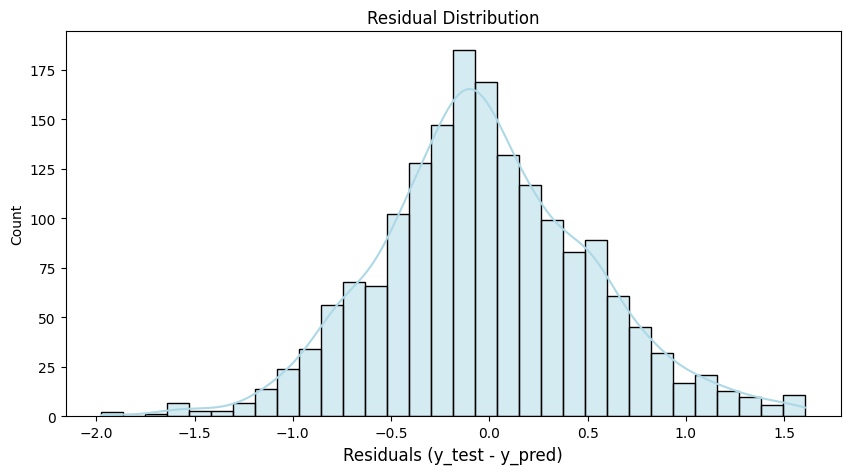

In [57]:
residual_distplot(y_pred_test_Lasso , y_test)

##Polynomial Regression

In [74]:
poly_pipeline = Pipeline([('poly_features' , PolynomialFeatures(include_bias = False)),('lin_reg' , LinearRegression())])
params = {'poly_features__degree' : [2,3,4]}
y_pred_train_pr, y_pred_test_pr = model_trainer_tester(poly_pipeline, X_train, X_test, y_train, y_test, params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ............................poly_features__degree=2; total time=   0.9s
[CV] END ............................poly_features__degree=2; total time=   0.5s
[CV] END ............................poly_features__degree=2; total time=   0.7s
[CV] END ............................poly_features__degree=3; total time=  37.5s
[CV] END ............................poly_features__degree=3; total time=  35.3s
[CV] END ............................poly_features__degree=3; total time=  32.9s
[CV] END ............................poly_features__degree=4; total time= 2.2min
[CV] END ............................poly_features__degree=4; total time= 2.2min
[CV] END ............................poly_features__degree=4; total time= 2.2min
Best hyperparameter combination is : {'poly_features__degree': 2}
The Mean Squared Error (MSE) for training set is : 0.16741943546546412
The Root Mean Squared Error (RMSE) for training set is : 0.4091692015113847

####The Polynomial Regression model with degree 2 performed well, explaining 83.15% of the variance on the training set and 81.67% on the testing set. The low RMSE values indicate accurate predictions with minimal error. Since the train and test performances are close, the model generalizes well without overfitting. Overall, it effectively captures non-linear relationships in the data.

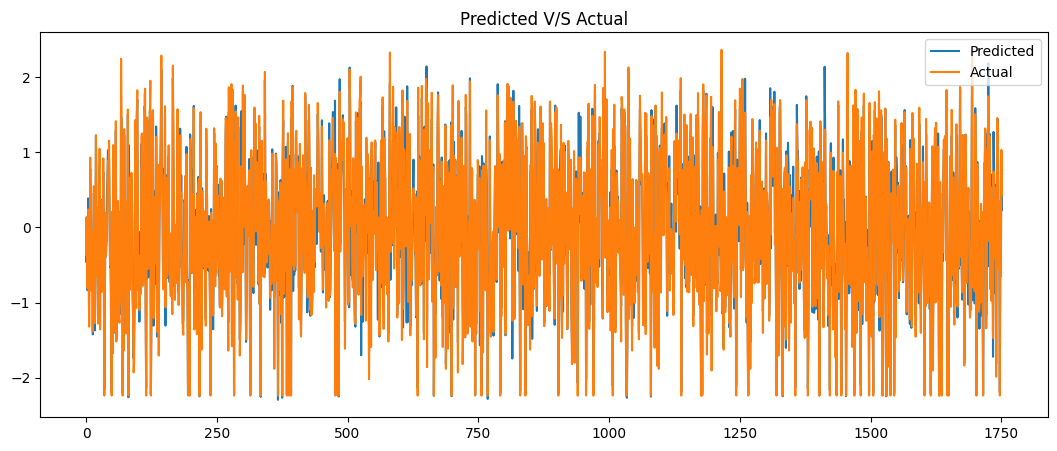

In [75]:
plot_pred_actual(y_pred_test_pr , y_test)

Text(0.5, 0, 'y_pred_test_pr')

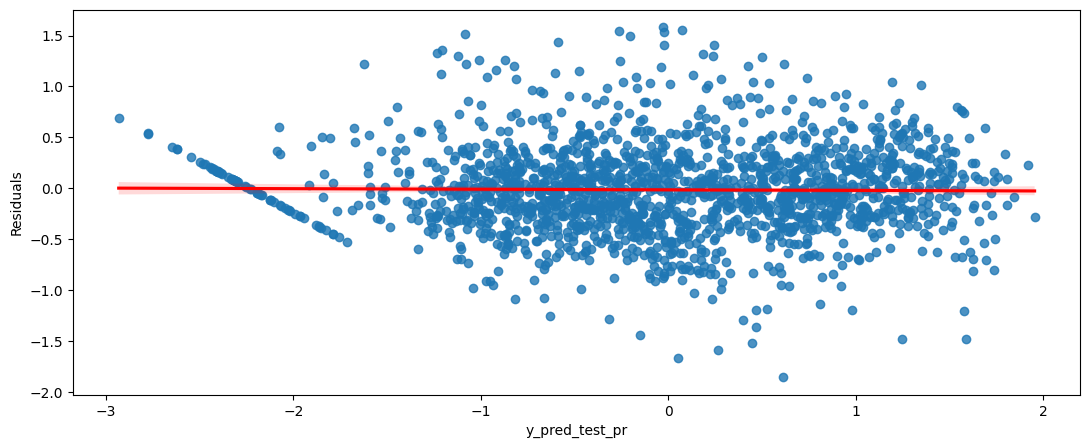

In [76]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test_pr , y = y_test-y_pred_test_pr , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_pr')

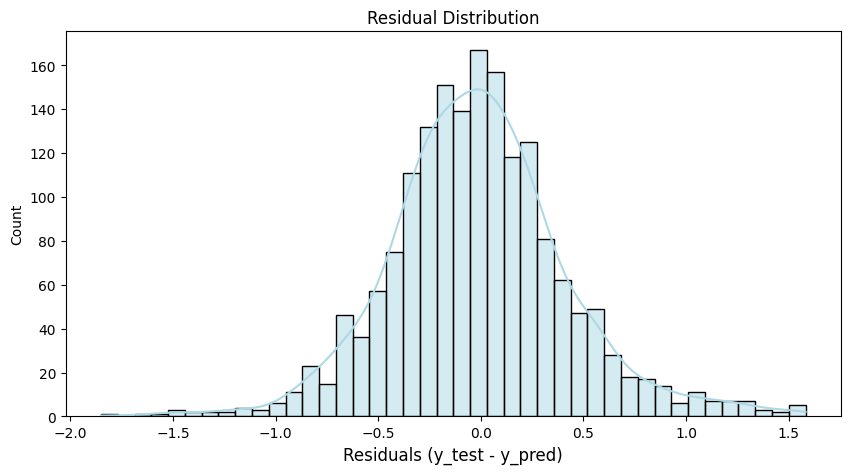

In [77]:
residual_distplot(y_pred_test_pr , y_test)

##Decision Tree Regression

In [58]:
parameters_dt = [{'max_depth': [4, 8, 12],'min_samples_split': [10, 50, 100],'min_samples_leaf': [5, 10]}]
y_pred_train_dt, y_pred_test_dt = model_trainer_tester(
    model = DecisionTreeRegressor(random_state=42),
    X_train_func = X_train,
    X_test_func = X_test,
    y_train_func = y_train,
    y_test_func = y_test,
    params = parameters_dt
)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4,

####The Decision Tree Regression model achieved strong performance, explaining 91.14% of the training variance and 87.73% of the testing variance. Its low RMSE values reflect accurate predictions. The small gap between training and testing scores indicates effective regularization and minimal overfitting. This makes it a reliable non-linear model for the dataset.

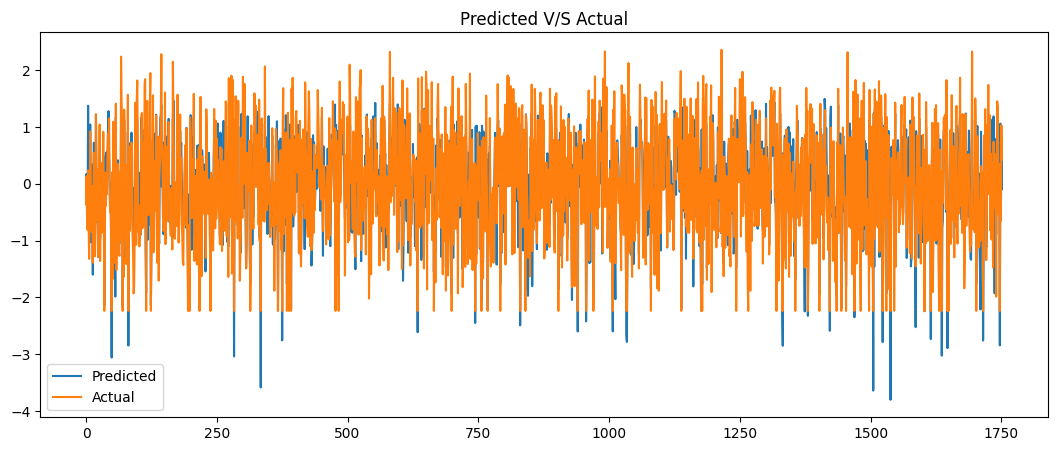

In [59]:
plot_pred_actual(y_pred_test_dt , y_test)

Text(0.5, 0, 'y_pred_test_dt')

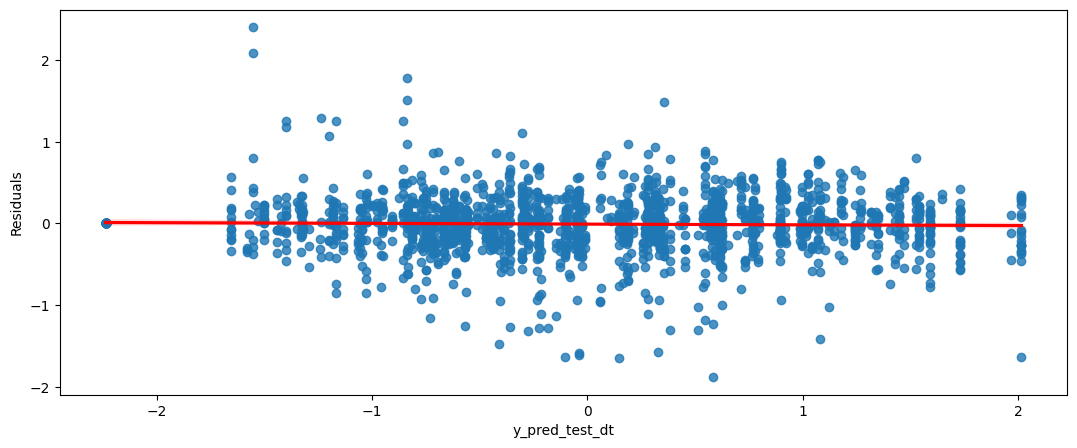

In [60]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test_dt , y = y_test-y_pred_test_dt , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_dt')

####This residual plot supports that the Decision Tree model is fitting the data well with minimal bias and moderate variance. The absence of clear patterns indicates that the model is not missing major relationships in the data.

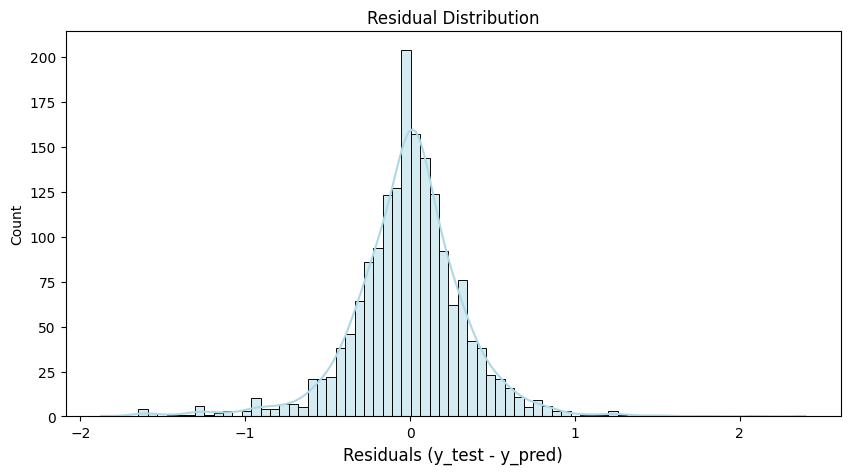

In [61]:
residual_distplot(y_pred_test_dt , y_test)

##Random Forest Regression

In [62]:
# Define parameter grid
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

# Call your function with the model and params
y_pred_train_rf, y_pred_test_rf = model_trainer_tester(
    model = RandomForestRegressor(n_jobs = -1, random_state=42),
    X_train_func = X_train,
    X_test_func = X_test,
    y_train_func = y_train,
    y_test_func = y_test,
    params = param
)


Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] END .......................max_depth=3, n_estimators=25; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=25; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=25; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=40; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=40; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=40; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=80; total time=   0.8s
[CV] END .......................max_depth=3, n_estimators=80; total time=   0.4s
[CV] END .......................max_depth=3, n_

####The Random Forest model with max_depth=9 and n_estimators=100 outperformed all previous models, achieving an R² of 0.887 on the test set compared to ~0.75 from earlier runs. It showed significantly lower RMSE and MSE, with minimal gap between training and testing performance—indicating excellent generalization.

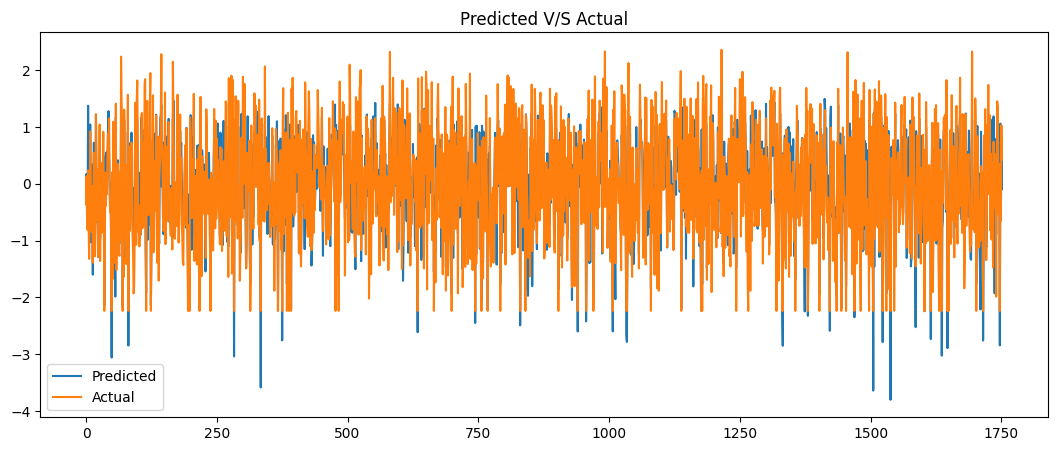

In [63]:
plot_pred_actual(y_pred_test_rf , y_test)

Text(0.5, 0, 'y_pred_test_rf')

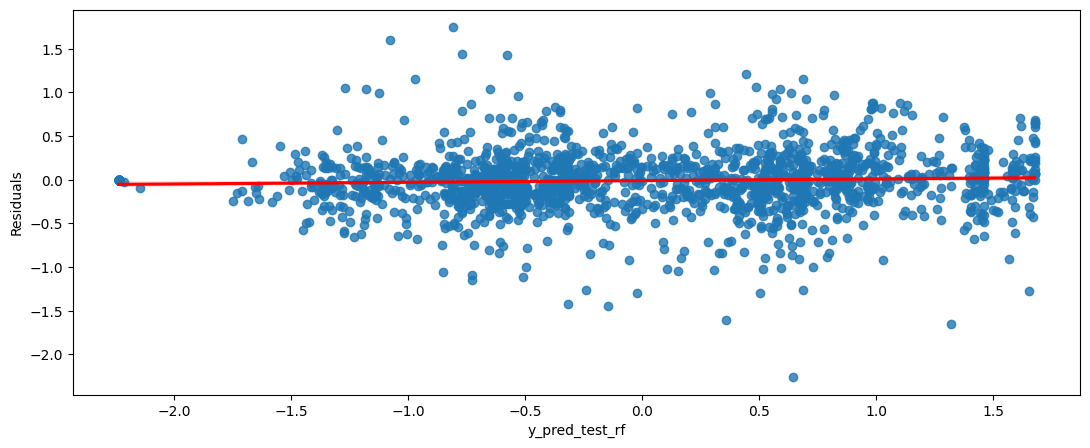

In [64]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test_rf , y = y_test-y_pred_test_rf , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_rf')

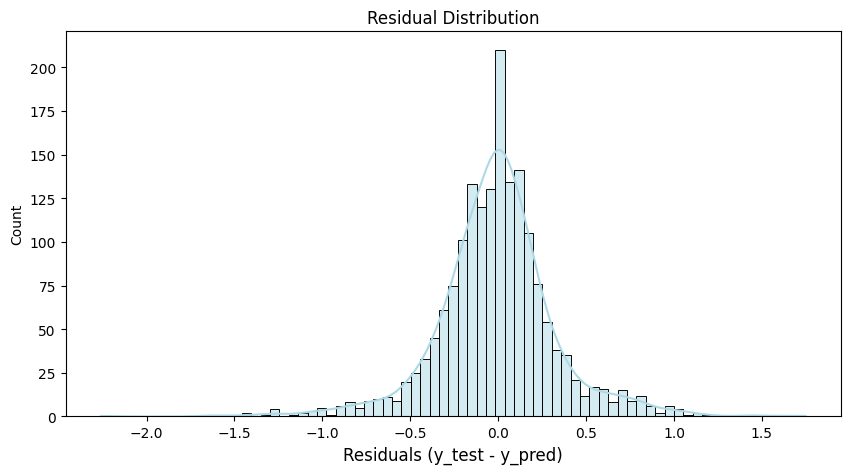

In [65]:
residual_distplot(y_pred_test_rf , y_test)

##Gradient Boosting Regression

In [66]:
parameters = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04],
    'subsample': [0.9, 0.5, 0.2, 0.1],
    'n_estimators': [50, 80, 100, 150],
    'max_depth': [4, 6, 8, 10]
}
y_pred_train, y_pred_test = model_trainer_tester(
    model = GradientBoostingRegressor(random_state=42),
    X_train_func = X_train,
    X_test_func = X_test,
    y_train_func = y_train,
    y_test_func = y_test,
    params = parameters
)


Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.1; total time=   0.1s
[CV] EN

####Compared to the previous models, Gradient Boosting outperforms all with the highest R² on both training (0.989) and testing (0.930) sets, indicating excellent fit and generalization. Random Forest showed good performance but had a noticeable drop in test R², while Linear and Polynomial Regression underfit the data.

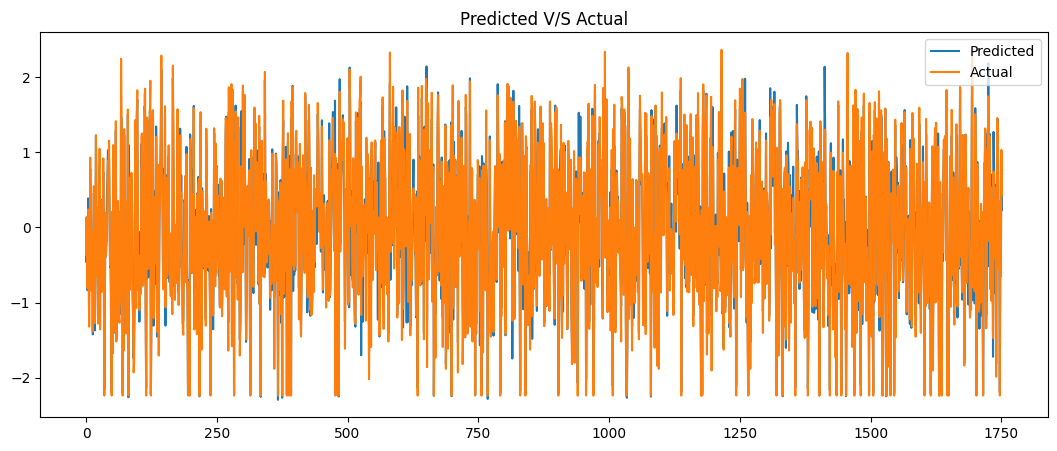

In [67]:
plot_pred_actual(y_pred_test , y_test)

Text(0.5, 0, 'y_pred_test_rf')

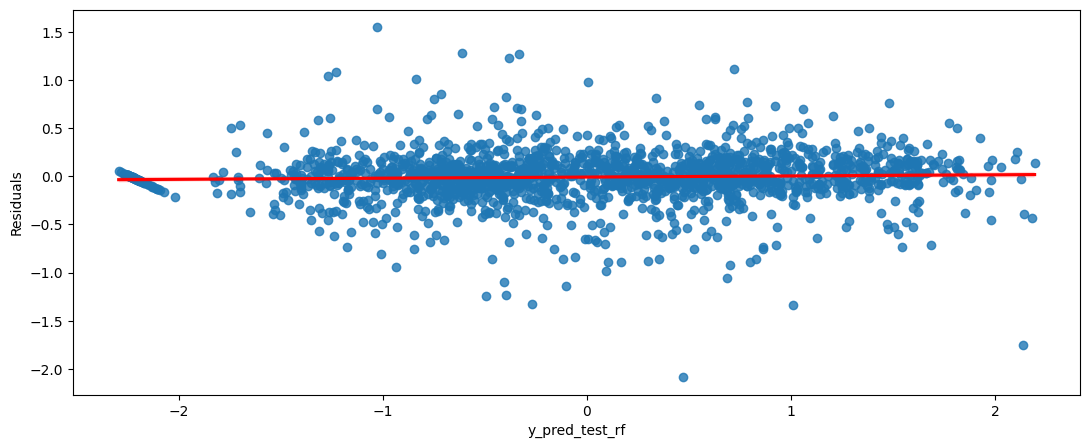

In [68]:
#Check homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize = (13,5))
sns.regplot(x = y_pred_test, y = y_test-y_pred_test , line_kws = {'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_pred_test_rf')

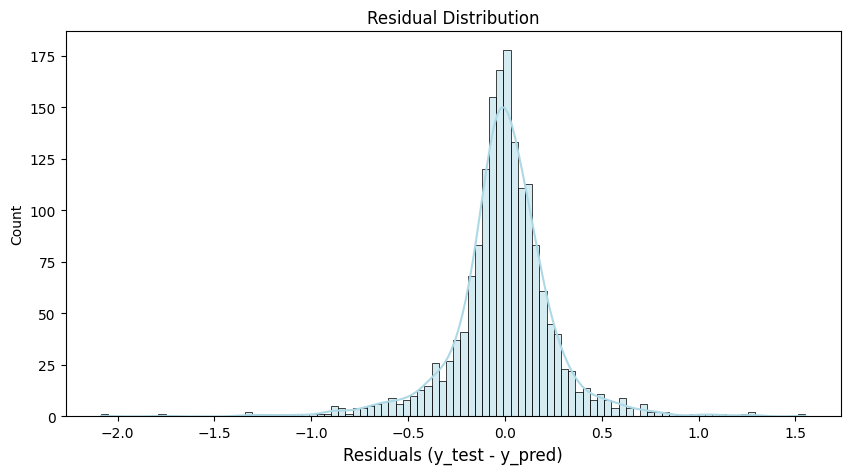

In [69]:
residual_distplot(y_pred_test , y_test)

##Model Evaluation

In [82]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
              'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],

    'Train RMSE': [0.5261, 0.5261, 0.5261, 0.4092, 0.2967, 0.2794, 0.1028],
    'Test RMSE': [0.5410, 0.5410, 0.5410, 0.4332, 0.3544, 0.3408, 0.2674],

    'Train R²': [0.7214, 0.7214, 0.7214, 0.8315, 0.9114, 0.9214, 0.9894],
    'Test R²': [0.7141, 0.7141, 0.7141, 0.8167, 0.8773, 0.8865, 0.9301],

    'Train MSE': [0.2768, 0.2768, 0.2768, 0.1674, 0.0880, 0.0781, 0.0106],
    'Test MSE': [0.2926, 0.2927, 0.2927, 0.1877, 0.1256, 0.1161, 0.0715]
})

results_df = results_df.sort_values(by='Test R²', ascending=False).reset_index(drop=True)
results_df


Model  Train RMSE  Test RMSE  Train R²  Test R²  Train MSE  \
0      Gradient Boosting      0.1028     0.2674    0.9894   0.9301     0.0106   
1          Random Forest      0.2794     0.3408    0.9214   0.8865     0.0781   
2          Decision Tree      0.2967     0.3544    0.9114   0.8773     0.0880   
3  Polynomial Regression      0.4092     0.4332    0.8315   0.8167     0.1674   
4       Lasso Regression      0.5261     0.5410    0.7214   0.7141     0.2768   
5      Linear Regression      0.5261     0.5410    0.7214   0.7141     0.2768   
6       Ridge Regression      0.5261     0.5410    0.7214   0.7141     0.2768   

   Test MSE  
0    0.0715  
1    0.1161  
2    0.1256  
3    0.1877  
4    0.2927  
5    0.2926  
6    0.2927

####After comparing multiple regression models using metrics such as RMSE, R², and MSE, Gradient Boosting emerged as the best-performing model. It achieved the lowest test RMSE (0.2674) and highest test R² (0.9301), indicating strong predictive accuracy and generalization to unseen data. Random Forest also performed well, with a test RMSE of 0.3408 and R² of 0.8865, but not as well as Gradient Boosting.On the other hand, linear models like Linear Regression, Ridge, and Lasso showed relatively higher RMSE values and lower R² scores, suggesting they are less effective for capturing complex patterns in the data.

###For the final part of this section, I am going to check variable importance in Linear Model and Random Forest Model to get an idea of important variables.

Text(0.5, 0, 'Features')

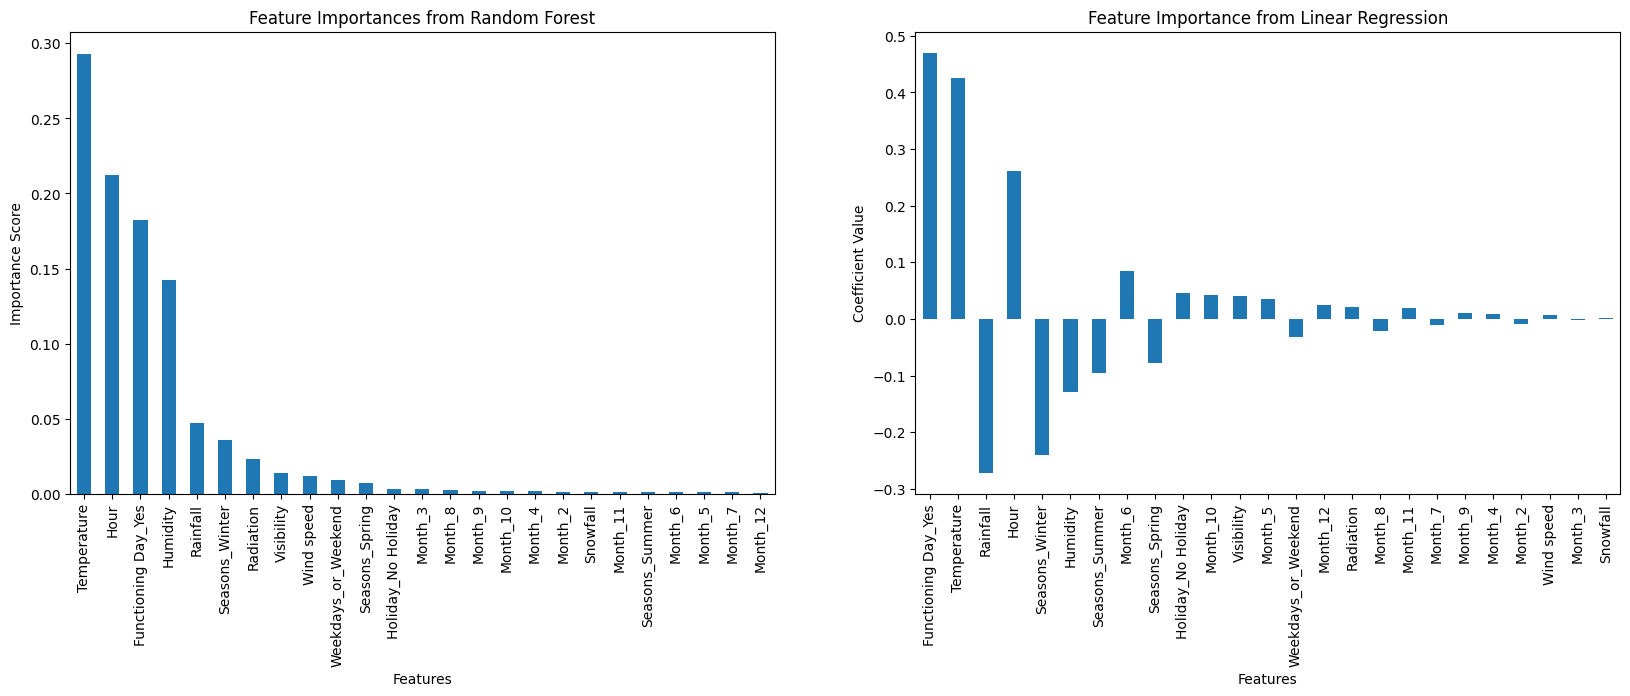

In [91]:
# Re-training the optimal Random Forest Model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)

#getting feature importances
importances = rf.feature_importances_
features = X.columns
forest_importances = pd.Series(importances, index=features).sort_values(ascending=False)

#getting feature coefficients
coefficients = lin_model.coef_
lin_importance = pd.Series(coefficients, index=features).sort_values(key=abs, ascending=False)
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
#plot feature importances for Random Forest
forest_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')

plt.subplot(1,2,2)
# Plotting feature importance for Linear Model
lin_importance.plot(kind='bar')
plt.title('Feature Importance from Linear Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')

####From the Random Forest model, Temperature, Hour, and Functioning Day emerged as the most influential features in predicting bike rentals, indicating non-linear and interactive effects. In contrast, Linear Regression showed Functioning Day, Rainfall, and Temperature as significant, but some coefficients may be misleading due to scale and multicollinearity. Overall, Random Forest offers more reliable feature importance, while Linear Regression helps interpret directionality.

##Final Verdict

####Gradient Boosting outperformed all models with the lowest test RMSE (0.2674) and highest R² (0.9301), making it the most accurate and reliable choice. Random Forest also performed well and provided meaningful feature importance, highlighting Temperature, Hour, and Functioning Day as key predictors.